In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
#print(df.head(2))

newdf = df.loc[:,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
print(newdf.head())

   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1        70        4    1     260    9.0    7.0       5     320        25   
2        50        4    0     140   14.0    8.0       0     330        25   
3       110        3    3     140    4.0   10.0       7     160        25   
4       120        3    1     200    6.0   11.0      14     260        25   

      rating  
0  68.402973  
1  59.425505  
2  93.704912  
3  40.448772  
4  37.840594  


In [2]:
newdf.iloc[:, 9] =  newdf.iloc[:, 9].astype(int)
y = newdf.iloc[:, 9]
y

0     68
1     59
2     93
3     40
4     37
      ..
69    39
70    27
71    49
72    51
73    36
Name: rating, Length: 74, dtype: int32

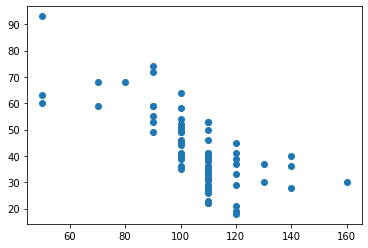

In [3]:
# Gradient descent is an iterative optimization algorithm to find the minimum of a function. 
X = newdf.iloc[:, 0]
#y =  newdf.iloc[:, 9]
plt.scatter(X, y)
plt.show()

In [4]:
# https://www.kaggle.com/residentmario/gradient-descent-with-linear-regression
import numpy as np

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = 0
        m = 0
        n = X.shape[0]
        print(n)
        for x1 in range(self.iterations):
            yi = m*X + b
            b_gradient = (-2 * np.sum(y - yi ) )/n
            m_gradient = (-2 * np.sum(X*(y - yi)))/n
            #print(m_gradient)
            b = b + self.learning_rate * b_gradient
            m = m - self.learning_rate * m_gradient
            #return(m, b)
            self.m, self.b = m, b
            return(self.m, self.b)
        
    def predict(self, X):
        return self.b*X + self.m

In [5]:
clf = GradientDescentLinearRegression()
d2 = clf.fit(X, y)
d2
# RuntimeWarning: invalid value encountered in double_scalars

74


(85.77567567567569, -0.847837837837838)

In [6]:
#X
clf.predict(X)


0     26.427027
1     26.427027
2     43.383784
3     -7.486486
4    -15.964865
        ...    
69    -7.486486
70    -7.486486
71     0.991892
72     0.991892
73    -7.486486
Name: calories, Length: 74, dtype: float64

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

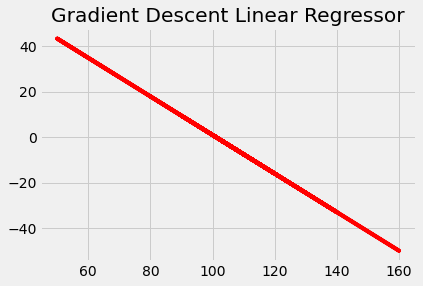

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

##plt.scatter(A1, A1, color='black')
plt.plot(X, clf.predict(X),  color='red')
plt.gca().set_title("Gradient Descent Linear Regressor")

In [8]:
#ERROR = YPREDICTED - YACTUAL

#the Loss function computes the error for a single training example, 
#while the Cost function is the average of the loss functions for all the training examples.

Machine learning uses derivatives in optimization problems. Optimization algorithms like gradient descent use derivates to decide whether to increase or decrease the weights to increase or decrease any objective function.

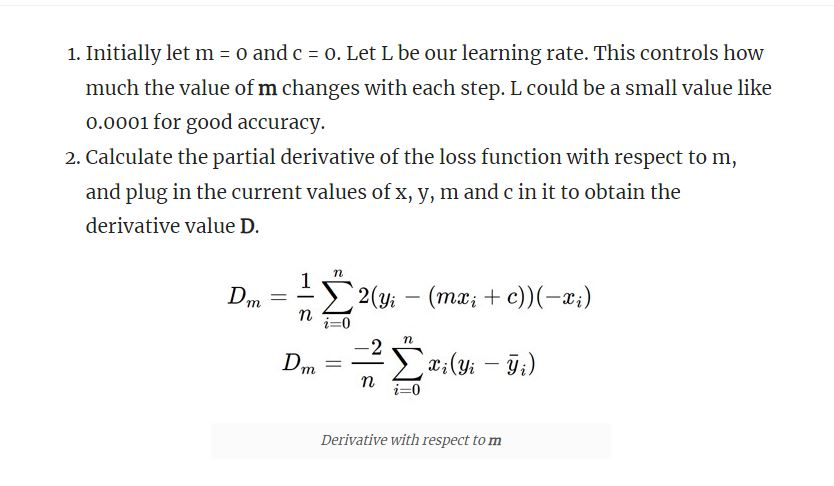

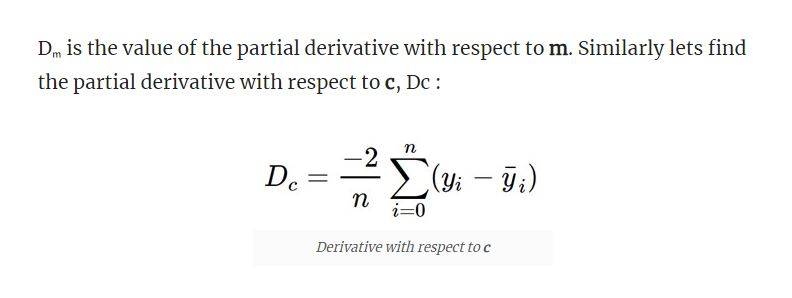

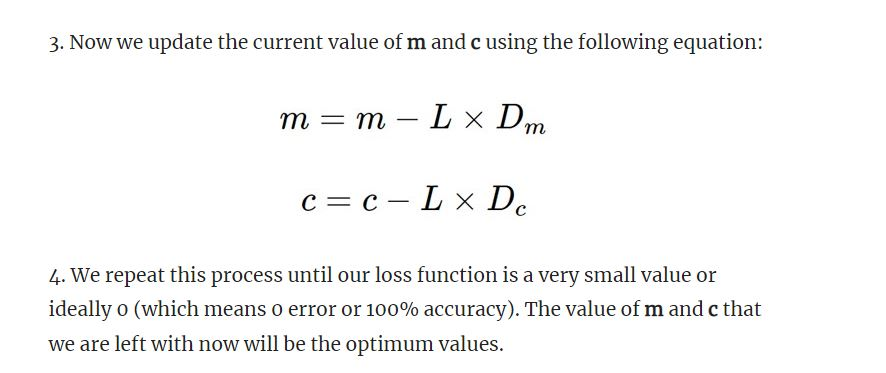

R-squared: 0.8621060731006233


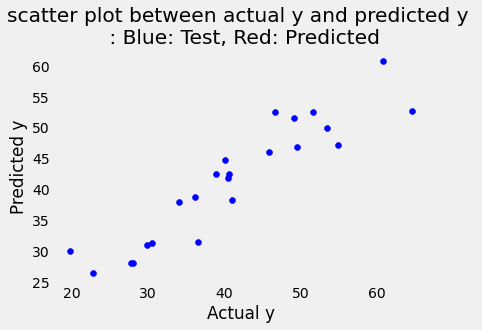

Mean Squared Error : 20.739198895369373
Mean Absolute Error : 3.3837054156294086


In [41]:
# SGD

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import scale

df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')
#df.axes
newdf = df.loc[:,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
#print(newdf.head())
x = scale(newdf.iloc[:, [0,1,4,6]])
# y = target values, last column of the data frame
y = newdf.iloc[:, 9]

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


# SkLearn SGD classifier
clf_ = SGDRegressor()
clf_.fit(x_train, y_train)


score = clf_.score(x_train, y_train)
print("R-squared:", score)



plt.scatter(y_test,clf_.predict(x_test), color='blue')
#print(range(len(clf_.predict(x_test))))

#plt.scatter(range(len(clf_.predict(x_test))), y_test, color='blue')
#plt.scatter(range(len(clf_.predict(x_test))), clf_.predict(x_test), color='red')
#plt.plot(y_test,clf_.predict(x_test))

plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y \n : Blue: Test, Red: Predicted')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(x_test)))

In [42]:
# RESET INDEX
ydf = y_test.to_frame()
#ydf = ydf.reset_index(level=0)
ydf.reset_index(drop=True, inplace=True)

# numpy.ndarray AS DF
ypredx['new Rating'] = pd.DataFrame(clf_.predict(x_test))
ypredx['new Rating'].reset_index(drop=True, inplace=True)

dfnew = pd.concat([ydf, ypredx['new Rating']],axis=1)
dfnew

,rating,new Rating
0,41.015492,38.387284
1,49.120253,51.596582
2,29.924285,31.119168
3,49.511874,46.946035
4,38.839746,42.567548
5,53.371007,50.041130
6,54.850917,47.151501
7,19.823573,30.065784
8,30.450843,31.410268
9,28.025765,28.057371


In [52]:
#type(y_test)
#type(x_test)
y_test.shape

(23,)

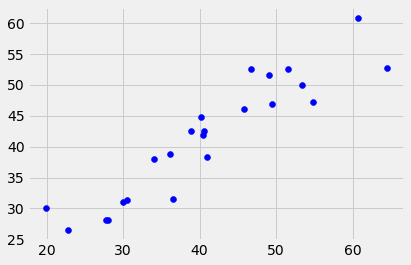

In [61]:

#plt.scatter(dfnew['rating'], dfnew['new Rating'], color='blue')
#print(len(dfnew['rating']))

# ternary operator example
colors=['red','blue','green','black']
plt.scatter(dfnew['rating'], dfnew['new Rating'] color = [colors[3] if x == 3000 else colors[0] for i in x])